# Tutorial: Using the python interface (and a bit about X-plane airframes)
This tutorial will show you how to use the python interface for the material properties libraries, and hopefully teach a little bit about materials selection for the X-planes flown by NACA/NASA and the US Air Force in the 1940s and 50s.

First, let's import some modules from the materials library, and pyplot for plotting:

In [1]:
import os.path
%matplotlib notebook
from matplotlib import pyplot as plt
import materials
from materials import plot_utils

## Loading a material
Next, we'll load the material properties data for a common aluminum alloy, 6061. The materials database is stored as YAML files in the `materials_data`. `material.load_from_yaml` reads the properties data from the YAML file, and creates a python `Material` object that we can interact with. `load_from_yaml` also requires the form (`'extruded, thickness > 1 inch'`) and condition ( `'T6'` temper) of the material, as some of the properties depend on the form and condition.

In [2]:
# Load material property data for aluminum alloy 6061 in the extruded form with T6 temper
filename = os.path.join(materials.get_database_dir(), 'Al_6061.yaml')
al6061 = materials.load_from_yaml(filename, 'extruded, thickness > 1 inch', 'T6')

## Playing with properties
The material has `Properties`, which have values and units. Let's examine the solidus temperature (melting point) of the 6061 alloy:

In [3]:
print(al6061['solidus_temperature'])
print(al6061['solidus_temperature'].query_value())
print(al6061['solidus_temperature'].units)

855.0
kelvin


The solidius temperature is a "simple" property - it has a single, definite value. Other properties have values which depend on the state of the material. For example, the Young's Modulus (the 'stiffness' of the material') depends on temperature: the material becomes less stiff as it gets hotter. Let's check the modulus of Al 6061 at 273 K (0 C or 32 F):

In [4]:
print(al6061['youngs_modulus'])
E = al6061['youngs_modulus'].query_value({'temperature': 273})
print('{:.1f} {:s}'.format(E, al6061['youngs_modulus'].units))

69.2 GPa


At 373 K (100 C), the modulus will be slightly lower:

In [5]:
E = al6061['youngs_modulus'].query_value({'temperature': 373})
print('{:.1f} {:s}'.format(E, al6061['youngs_modulus'].units))

67.3 GPa


We can also query the value of the modulus at several temperatures:

In [6]:
print(al6061['youngs_modulus'].query_value({'temperature': [100, 200, 300]}))

[75.85480813 71.42426073 68.60458108]


## Plotting
`plot_utils` provides a function for plotting how a property varies with state. Let's plot the variation of Young's modulus with temperature:

<IPython.core.display.Javascript object>


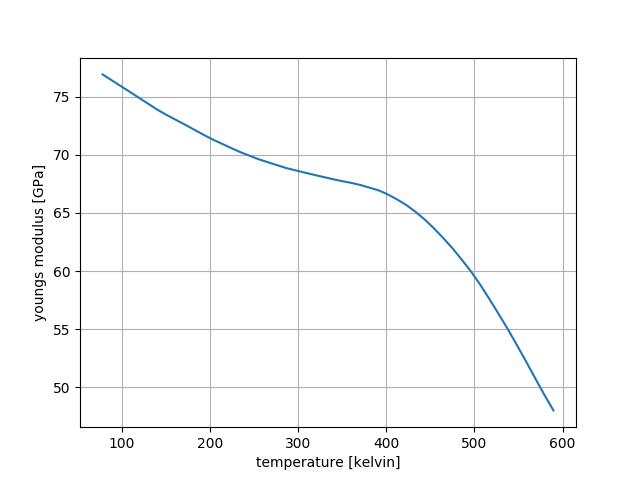

In [7]:
axes = plot_utils.plot_property_vs_state(al6061['youngs_modulus'], 'thermal', 'temperature')
plt.grid()
plt.show()

We can also decorate the axes with temperature comparisons:

<IPython.core.display.Javascript object>


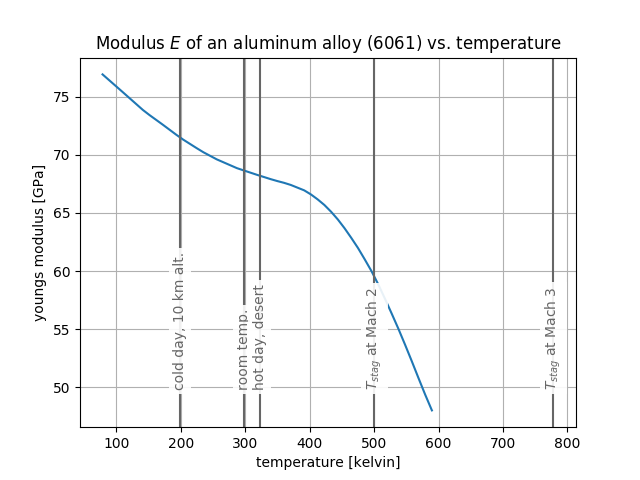

In [8]:
axes2 = plot_utils.plot_property_vs_state(al6061['youngs_modulus'], 'thermal', 'temperature')
plot_utils.decorate_temperature_axis(axes2, (50, 800), 'aviation')
plt.grid()
plt.title('Modulus $E$ of an aluminum alloy (6061) vs. temperature')
plt.show()

## X-plane airframe materials selection
Why do these material properties matter to aircraft designers? Let's use the chart we just made to investigate the choice of airframe materials for the early X-planes, the Bell X-1 and X-2. These aircraft were developed to prove the possibility of supersonic flight. One of the challenges of supersonic flight is aerodynamic heating of the airframe - the motion of the aircraft compresses and heats the air, which transfers heat into the airframe. This effect is more severe at higher Mach numbers. Before the X-1 and X-2, most high performace aircraft had been made from aluminum alloy airframes. A key question for the X-plane designers was: could aluminum alloys take the heat of supersonic flight?

The skin of an aircraft must be stiff enough to carry the applied loads without buckling. Thus, the skin material must maintain a sufficiently high Young's modulus at the expected operating temperature. Figure 2 shows that a typical aluminium alloy maintains a modulus > 60 GPa up about 500 K, the stagnation temperature at Mach 2 flight, but then the modulus declines rapidly with further increases in temperature. Thus, we can expect that aricraft flying below Mach 2 can use aluminum airframes, but aircraft flying faster will need more temperature resistant materials. Indeed, the X-1 (top speed of Mach 1.26) used aluminum [[source](https://airandspace.si.edu/collection-objects/bell-x-10)], while the X-2 (top speed of Mach 3.2) used nickel alloys and stainless steel [[source](http://abyss.uoregon.edu/~js/space/lectures/lec04.html)].